In [1]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where


In [2]:
df = pd.read_csv('/Users/reejungkim/Documents/python functions/creditcard 2.csv')


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df = df[['V1','V2']]

커널기법 적용. 비선형의 단점 보환. 
데이터를 확장하지 않고 확장된 특성에 대해 데이터 포인트들의 거리를 계산.

 nu = 0.03 means that the algorithm will designate 3% data as outliers.


In [7]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df)


In [8]:
# prediction
y_pred = model.predict(df)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [9]:
# filter outlier index
outlier_index = where(y_pred == 1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,V1,V2
0,-1.359807,-0.072781
1,1.191857,0.266151
2,-1.358354,-1.340163
3,-0.966272,-0.185226
4,-1.158233,0.877737
...,...,...
284801,0.120316,0.931005
284803,-0.732789,-0.055080
284804,1.919565,-0.301254
284805,-0.240440,0.530483


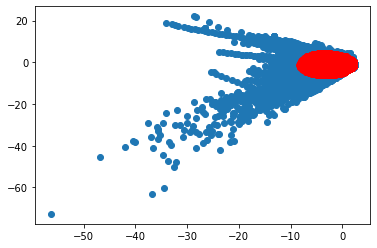

In [11]:
# visualize outputs
plt.scatter(df["V1"], df["V2"])
plt.scatter(outlier_values["V1"], outlier_values["V2"], c = "r")
